## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=",")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

Пропусков нет

purpose, personal_status_sex, property - категориальные

duration, amount, age - вещественные

status, credit_history, savings, other_debtors, employment_duration, installment_rate, other_installment_plans, number_credits, housing, job, present_residence - порядковые

people_liable, telephone, foreign_worker, credit_risk - бинарные

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby(by='purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0]

0.6666666666666666

In [6]:
data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0]

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '>= 6') | (data['number_credits'] == '4-5'))].shape[0]

1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

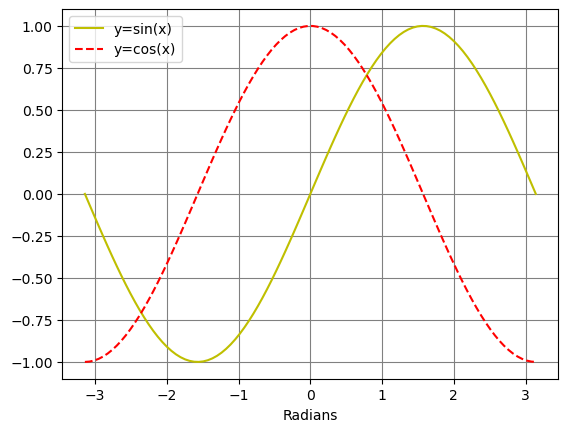

In [9]:
x = np.linspace(-np.pi, np.pi, 100)
plt.grid(color='gray')
plt.plot(x, np.sin(x), color='y')
plt.plot(x, np.cos(x), color='r', linestyle='--')
plt.xlabel('Radians')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

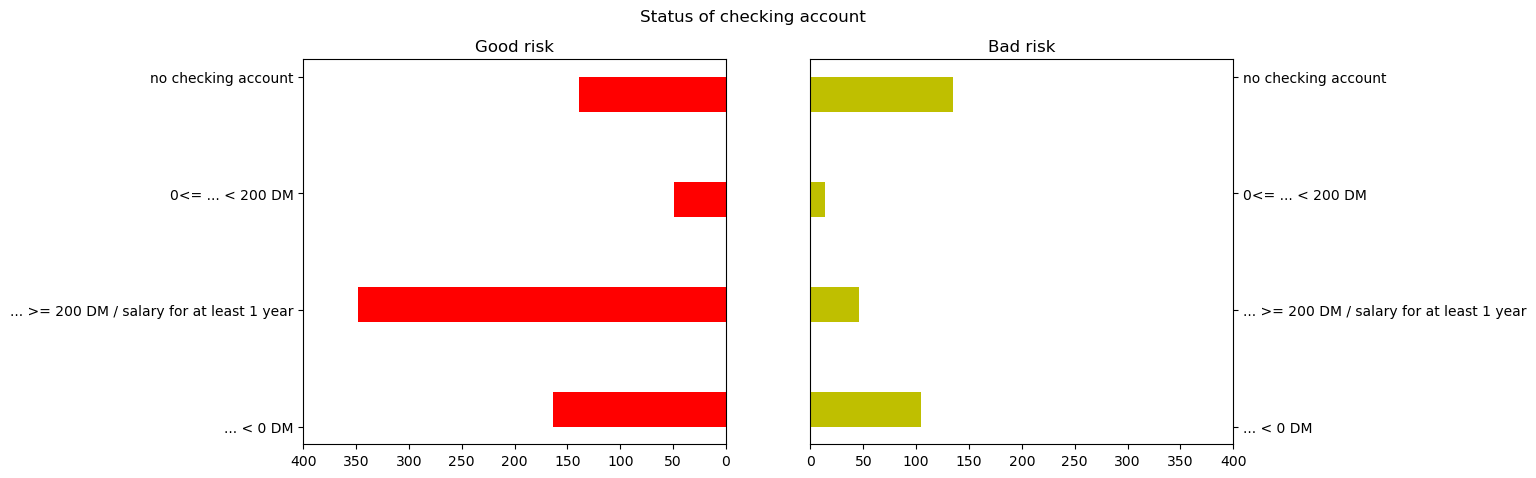

In [10]:
graph, (plot1, plot2) = plt.subplots(1, 2, figsize=(12, 5))
plot1.hist(sorted(data[data['credit_risk'] == 'good']['status']), orientation='horizontal', color='r')
plot1.set_title('Good risk')
plot1.invert_xaxis() 
plot2.hist(sorted(data[data['credit_risk'] == 'bad']['status']), orientation='horizontal', color='y')
plot2.set_title('Bad risk')
plot1.set_xticks(np.arange(0, 401, 50))
plot2.set_xticks(np.arange(0, 401, 50))
plot2.yaxis.tick_right()
graph.suptitle('Status of checking account')
plt.show()

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

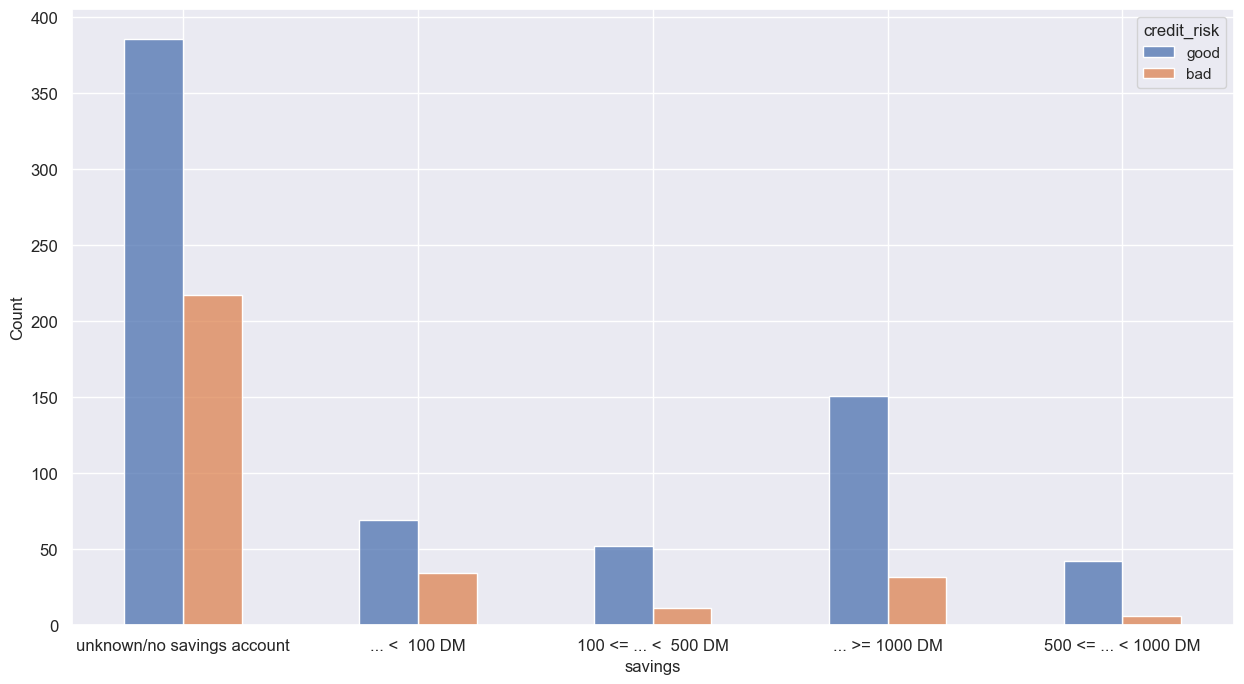

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
sns.histplot(data, x="savings", hue="credit_risk", multiple="dodge", shrink=0.5)
plt.tick_params(labelsize=12)
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

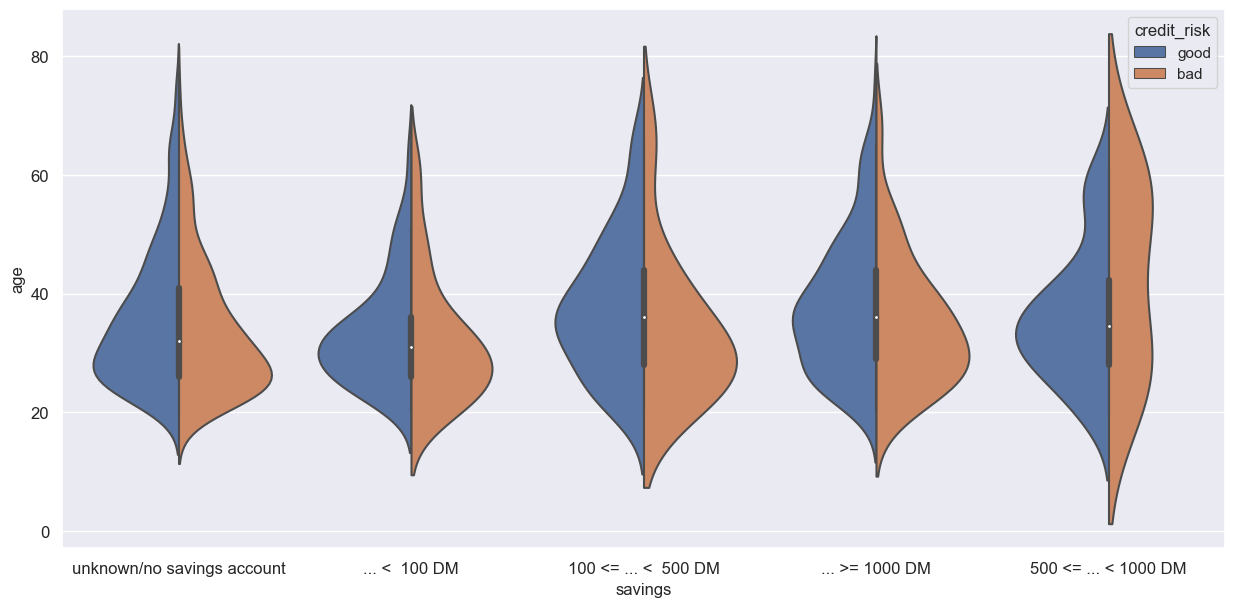

In [13]:
plt.figure(figsize=(15, 7))
sns.violinplot(x=data['savings'], y=data['age'], hue=data['credit_risk'], split=True)
plt.tick_params(labelsize=12)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

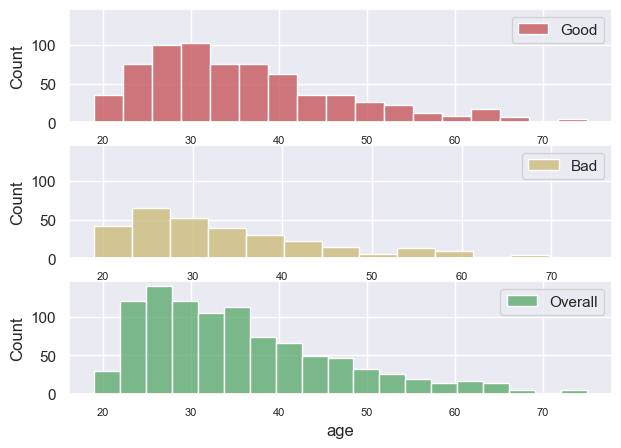

In [14]:
fig, axs = plt.subplots(nrows=3, figsize=(7, 5), sharey=True)
sns.histplot(data[data['credit_risk'] == 'good'], x='age', color='r', ax=axs[0])
axs[0].tick_params(axis='x', labelsize=8)
sns.histplot(data[data['credit_risk'] == 'bad'], x='age', color='y', ax=axs[1])
axs[1].tick_params(axis='x', labelsize=8)
sns.histplot(data, x='age', color='g', ax=axs[2])
axs[2].tick_params(axis='x', labelsize=8)
axs[0].legend(['Good'])
axs[1].legend(['Bad'])
axs[2].legend(['Overall'])
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

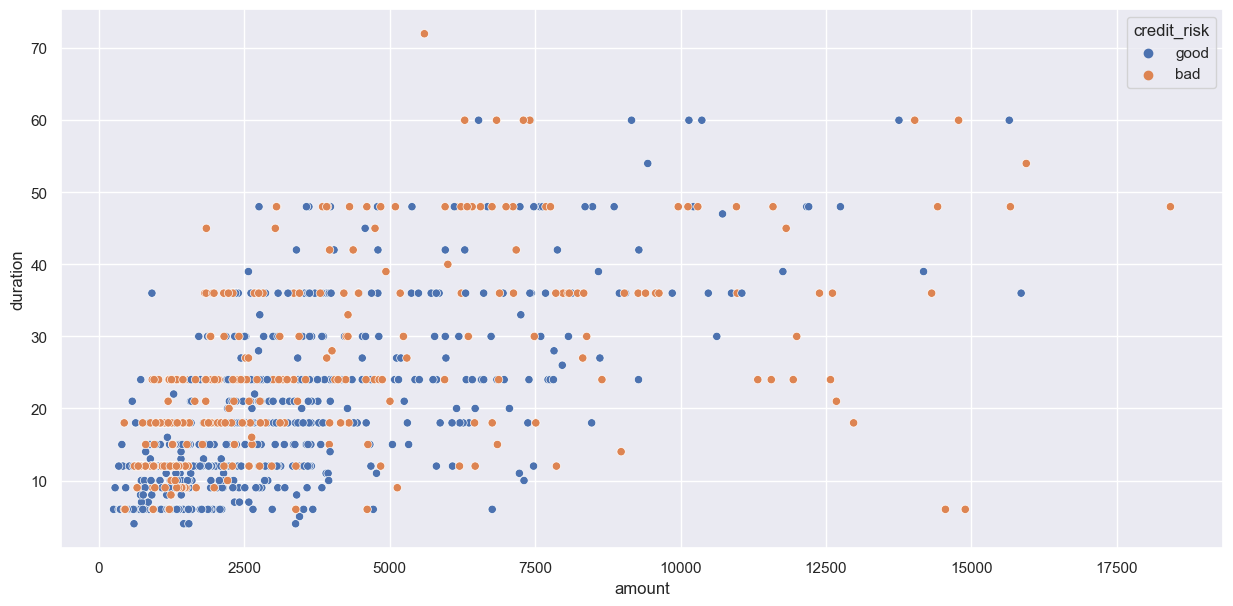

In [15]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x=data['amount'], y=data['duration'], hue=data['credit_risk'])
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

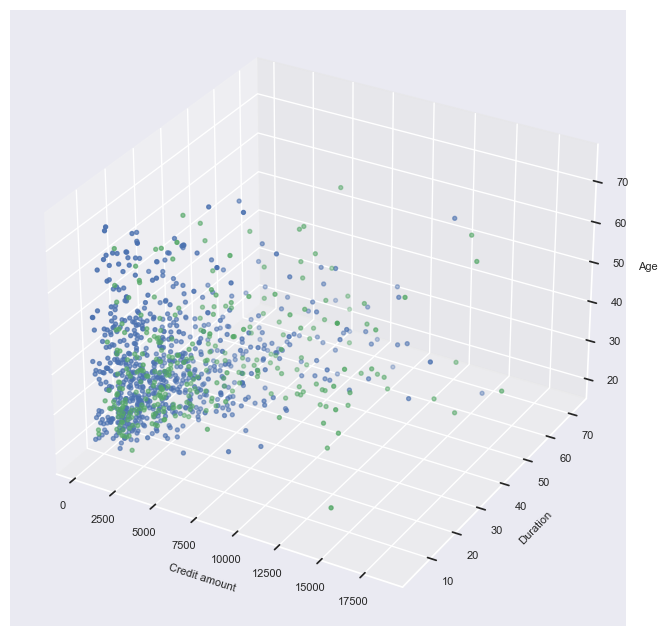

In [16]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(tuple(good['amount']), tuple(good['duration']), tuple(good['age']), color='b', s=8)
ax.scatter(tuple(bad['amount']), tuple(bad['duration']), tuple(bad['age']), color='g', s=8)
ax.tick_params(labelsize=8)
ax.set_xlabel('Credit amount', fontsize=8)
ax.set_ylabel('Duration', fontsize=8)
ax.set_zlabel('Age', fontsize=8)
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
data['people_liable'].replace(['0 to 2', '3 or more'], [0, 1], inplace=True)
data['telephone'].replace(['no', 'yes (under customer name)'], [0, 1], inplace=True)
data['foreign_worker'].replace(['no', 'yes'], [0, 1], inplace=True)
data['credit_risk'].replace(['bad', 'good'], [0, 1], inplace=True)
data['status'].replace(['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'], [0, 1, 2, 3], inplace=True)
data['credit_history'].replace(['critical account/other credits elsewhere', 'delay in paying off in the past', 'existing credits paid back duly till now', 'all credits at this bank paid back duly', 'no credits taken/all credits paid back duly'], [0, 1, 2, 3, 4], inplace=True)
data['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'], [0, 1, 2, 3, 4], inplace=True)
data['other_debtors'].replace(['co-applicant', 'guarantor', 'none'], [0, 1, 2], inplace=True)
data['job'].replace(['unemployed/unskilled - non-resident', 'unskilled - resident', 'manager/self-empl./highly qualif. employee', 'skilled employee/official'], [0, 1, 2, 3], inplace=True)
data['other_installment_plans'].replace(['bank', 'stores', 'none'], [0, 1, 2], inplace=True)
data['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3, 4], inplace=True)
data['installment_rate'].replace(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'], [0, 1, 2, 3], inplace=True)
data['number_credits'].replace(['>= 6', '4-5', '2-3', '1'], [0, 1, 2, 3], inplace=True)
data['housing'].replace(['rent', 'for free', 'own'], [0, 1, 2], inplace=True)
data['present_residence'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3], inplace=True)
data.drop(['purpose', 'personal_status_sex', 'property'], inplace=True, axis=1)
data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,3,1049,0,1,0,2,3,21,2,1,3,3,0,0,0,1
1,0,9,3,2799,0,2,2,2,1,36,2,1,2,3,1,0,0,1
2,1,12,4,841,1,3,2,2,3,23,2,1,3,1,0,0,0,1
3,0,12,3,2122,0,2,1,2,1,39,2,1,2,1,1,0,1,1
4,0,12,3,2171,0,2,0,2,3,38,0,0,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,4,1987,0,2,2,2,3,21,2,1,3,1,1,0,0,0
996,0,24,4,2303,0,4,0,0,0,45,2,0,3,3,0,0,0,0
997,3,21,3,12680,4,4,0,2,3,30,2,2,3,2,0,1,0,0
998,1,12,4,6468,4,0,2,2,0,52,2,0,3,2,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [18]:
def predict(Xtest: np.array) -> np.array:
    return np.ones(Xtest.shape[0], dtype=int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\Александр\AppData\Local\Temp\ipykernel_16756\570713464.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.66

Т.к. в тестовой выборке 2/3 значений целевой переменной равны 1, то просто возвращая 1, можно добиться точности 66%

In [84]:
def predict(Xtest: np.array) -> np.array:
    lst = []
    for i in Xtest:
        k = 0
        for j in range(17):
            if np.quantile(X_train[:,j], 0.5) <= i[j]:
                k += 1
        if (k >= 10 or i[3] <= np.quantile(X_train[:,3], 0.25)) and (i[2] != 0 or i[13] != 0):
            res = 1
        else:
            res = 0
        lst.append(res)
    return np.array(lst)
        

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\Александр\AppData\Local\Temp\ipykernel_16756\1303388243.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.692

In [91]:
def predict(Xtest: np.array) -> np.array:
    lst = []
    for i in Xtest:
        k = 0
        for j in range(17):
            if np.quantile(X_train[:,j], 0.5) <= i[j]:
                k += 1
        if (k >= 10 or i[3] <= np.quantile(X_train[:,3], 0.25)) and (i[2] != 0 or i[13] != 0):
            res = 1
        else:
            res = 0
        lst.append(res)
    return np.array(lst)
        

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
li = []
for m in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=m)
    li.append(accuracy_score(y_test, predict(X_test)))
sum(li) / len(li)
# Используйте X_train и y_train на ваше усмотрение
# your code here

C:\Users\Александр\AppData\Local\Temp\ipykernel_16756\1287436562.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.6924444444444444

In [88]:
print(predict(X_test))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1]
